# Dimensionality Reduction Using a Principal Component Analysis

In order to analyze the DrugMatrix data, we will first explore it using dimensionality reduction and cluster analysis. This will allow us to represent the data in a two-dimensional space and find hidden relationships in the data.

### Principal Component Analysis

PCA reduces dimensionality by finding principal components. These are directions  of maximum variation in a dataset. This will allow us to reduce a dataset's original features to a set of new ones based on the principal components. In this way, we end up with the least amount of features that keep the maximum amount of variation about how the data is distributed.

## Preparing data

Here we import the DrugMatrix CSV file of drugs and side effects from the google drive folder as a dataframe entitled: 'DM_df'

In [10]:
import pandas as pd

DM_df = pd.read_csv('https://drive.google.com/uc?export=download&id=0B3bVNa1CiFWdYTY2dGJUQWJtVGc',index_col = 0, sep='\t')

DM_df.index.names = ['Drugs']
DM_df.columns.names = ['SEs']
DM_df.head()


SEs,Death,Coma,Tremor,Somnolence,L_Hepatitis,Ataxia,Lacrimation,Convulsions,Dyspnea,Gen_Anesthesia,...,Analgesia,Demyelation,Cardiac_Arrythmias,Jaundice,Aplastic Anemia,Aggression,Anticonvulsant,Thrombocytopenia,Sleep,Hallucinations
Drugs,,,,,,,,,,,,,,,,,,,,,
"1,1-DICHLOROETHENE",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,4-DICHLOROBENZENE",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17-METHYLTESTOSTERONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1-NAPHTHYL ISOTHIOCYANATE,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"2,3,7,8-TETRACHLORODIBENZO-P-DIOXIN",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We specified index_col to be 0 in order to make the drug names the row labels. We used the '\t' separator because our csv is actually tab-delimited (not comma). The head() function shows the first few lines to ensure our output is correct.

## Dimensionality Reduction

Ideally at this point we want to represent each drug in a two dimensional space. This dataset has each sample as a drug defined by 46 different variables - each corresponding to a distinct side-effect. This is binary data, meaning that each sample is categorized as either causing a specific side-effect or not - there is no gradient. Because of this, we may need more data to accurately reduce these 46 variables to just two of them that best captures the variation. 

Fortunately, python's Sci-kit machine learning library comes with PCA implementation

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(DM_df)

DM_2d = pca.transform(DM_df)

DM_df_2d = pd.DataFrame(DM_2d)
DM_df_2d.index = DM_df.index
DM_df_2d.columns = ['PC1','PC2']
DM_df_2d.head()

,PC1,PC2
Drugs,,
"1,1-DICHLOROETHENE",-0.196870,-0.035994
"1,4-DICHLOROBENZENE",-0.219639,-0.025902
17-METHYLTESTOSTERONE,-0.219639,-0.025902
1-NAPHTHYL ISOTHIOCYANATE,-0.222686,-0.020241
"2,3,7,8-TETRACHLORODIBENZO-P-DIOXIN",-0.219639,-0.025902


Here we transformed our data into a lower representation and put it into a new dataframe: 'DM_df_2d'

We also can check the explained variance ratio as shown below.

In [12]:
print(pca.explained_variance_ratio_)

[ 0.22348055  0.14052122]


## Plotting the data

Here all we have to do is to call plot on the dataframe. We can add annotation loops that tag every point with it's drug name.

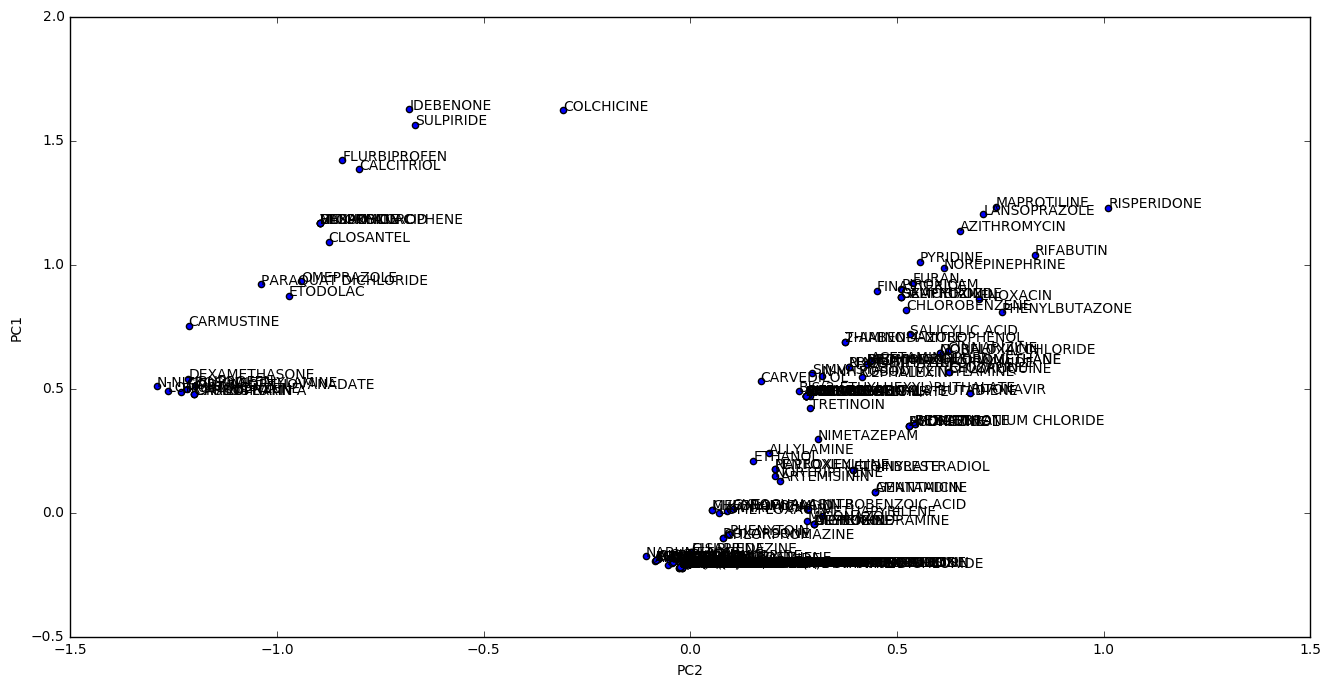

In [13]:
%matplotlib inline

ax = DM_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_df.index):
    ax.annotate(Drug, (DM_df_2d.iloc[i].PC2, DM_df_2d.iloc[i].PC1))

Additionally we can create a bubble chart to visualize the mean value for all the side effects of a particular drug corresponding to point size. First we'll add a new column containing the scaled mean per drug across all the side effects.

In [14]:
from sklearn.preprocessing import normalize

DM_df_2d['Drug_mean'] = pd.Series(DM_df.mean(axis=1), index=DM_df_2d.index)
Drug_mean_max = DM_df_2d['Drug_mean'].max()
Drug_mean_min = DM_df_2d['Drug_mean'].min()
Drug_mean_scaled = (DM_df_2d.Drug_mean-Drug_mean_min) / Drug_mean_max
DM_df_2d['Drug_mean_scaled'] = pd.Series(
    Drug_mean_scaled, 
    index=DM_df_2d.index)
DM_df_2d.head()

,PC1,PC2,Drug_mean,Drug_mean_scaled
Drugs,,,,
"1,1-DICHLOROETHENE",-0.196870,-0.035994,0.065217,0.428571
"1,4-DICHLOROBENZENE",-0.219639,-0.025902,0.000000,0.000000
17-METHYLTESTOSTERONE,-0.219639,-0.025902,0.000000,0.000000
1-NAPHTHYL ISOTHIOCYANATE,-0.222686,-0.020241,0.021739,0.142857
"2,3,7,8-TETRACHLORODIBENZO-P-DIOXIN",-0.219639,-0.025902,0.000000,0.000000


Now we can plot using variable size, omitting Drug name.

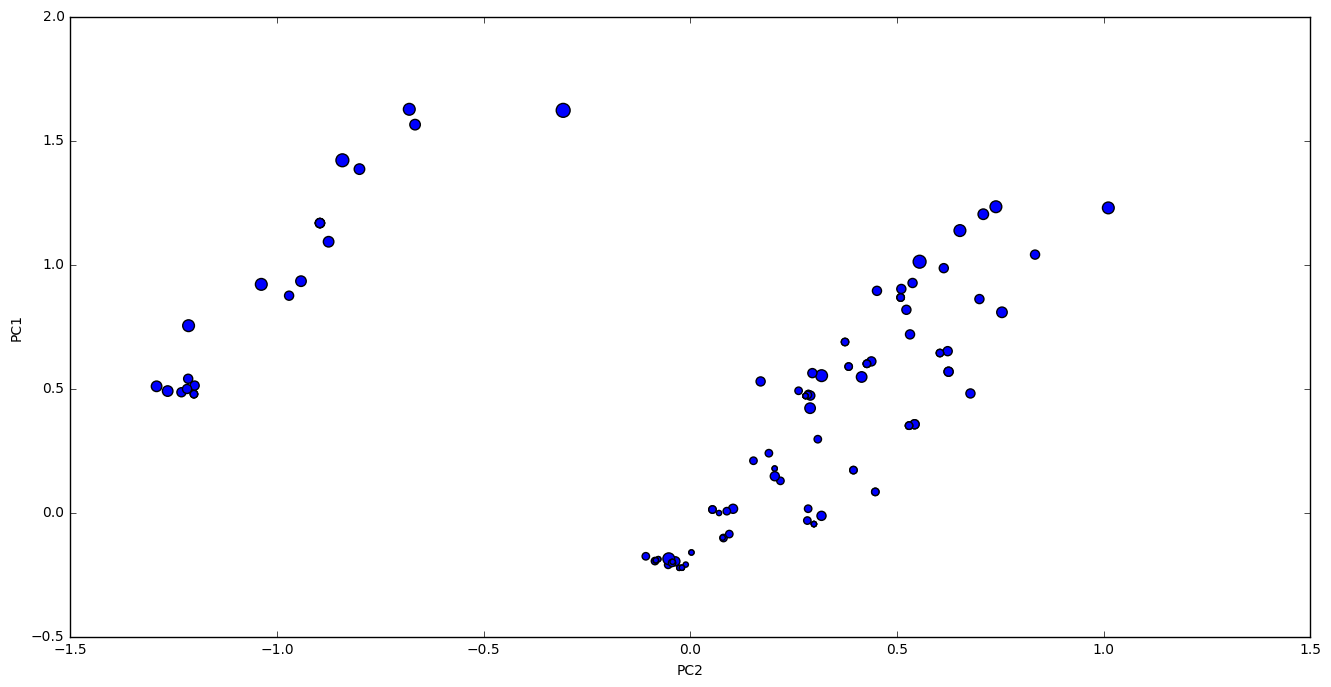

In [15]:
DM_df_2d.plot(kind='scatter', x='PC2', y='PC1', s=DM_df_2d['Drug_mean_scaled']*100, figsize=(16,8))

We can also do the same with the sum as opposed to the mean to compare.

from sklearn.preprocessing import normalize

DM_df_2d['Drug_sum'] = pd.Series(DM_df.sum(axis=1), index=DM_df_2d.index)
Drug_sum_max = DM_df_2d['Drug_sum'].max()
Drug_sum_min = DM_df_2d['Drug_sum'].min()
Drug_sum_scaled = (DM_df_2d.Drug_sum-Drug_sum_min) / Drug_sum_max
DM_df_2d['Drug_sum_scaled'] = pd.Series(
    Drug_sum_scaled, 
    index=DM_df_2d.index)
DM_df_2d.head()
DM_df_2d.plot(kind='scatter', x='PC2', y='PC1', s=DM_df_2d['Drug_sum_scaled']*100, figsize=(16,8))

From this preliminary data, we can confirm that most variation is along the y-axis, which corresponds to our first principal component. Unfortunately, with 47 features within the data of 371 samples, this first principal component only comprises ~22% of the variance. Combined with the second principal component (~14%) we still only account for about ~36% of the variance using these two components. So let's look at a few more components and see if we can capture a majority of the variance:

In [18]:
pca = PCA(n_components=4)
pca.fit(DM_df)
print(pca.explained_variance_ratio_)

[ 0.22348055  0.14052122  0.10559709  0.0757487 ]


At four components, we capture ~55% of the variance...

In [20]:
pca = PCA(n_components=8)
pca.fit(DM_df)
print(pca.explained_variance_ratio_)

[ 0.22348055  0.14052122  0.10559709  0.0757487   0.07147043  0.04292512
  0.03374302  0.03252044]


...And at 8 components we capture ~75% of the variance. So in this case, because the data is sparse, we would be better served to use more principal components to accurately reduce the dimensionality of this dataset from 47 to 8. Alternatively, we can update the dataset with more data and then be able to capture more variability with less dimensions.

## K-means Clustering (R)

Here we can use K-means clustering to group drugs based on how similar their side-effects have been year-by-year (using the 46 side-effect variables). Then we can color the 2D chart and hopefully find hidden relationships within the data.

Using K-means requires us to determine the correct number of groups for our case. Theoretically, we can iterate through different numbers of groups and compare the "within-cluster sum of square distances" for each iteration (the squared sum of distances to the cluster center for each point in the cluster), but because this is an exploratory task, we'll keep it simple and try to just use 3 groups (k=3).

In [7]:
urlfile<-'https://drive.google.com/uc?export=download&id=0B3bVNa1CiFWdYTY2dGJUQWJtVGc'
dsin<-read.csv(urlfile)

set.seed(1234)
DM_clustering <- kmeans(dsin, centers = 3)

Warning message in kmeans(dsin, centers = 3):
"NAs introduced by coercion"

ERROR: Error in kmeans(dsin, centers = 3): more cluster centers than distinct data points.


Here we can see that the data is too sparse and scattered to produce any meaningful clusters. Because this dataset is binary, there are alot of side-effects that are ignored. This can be remedied by adding more data via alternate toxicity databases.